# Cora Dataset

Contains general exploration of the cora dataset.

In [2]:
from stellargraph import StellarGraph
from IPython.core.display_functions import display
from IPython.core.display import HTML
from stellargraph.datasets import datasets
import numpy as np

dataset = datasets.Cora()
display(HTML(dataset.description))
G, subjects = dataset.load(largest_connected_component_only=True)
G: StellarGraph = G

2022-05-25 15:41:07.649610: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 2485, Edges: 5209

 Node types:
  paper: [2485]
    Features: float32 vector, length 1433
    Edge types: paper-cites->paper

 Edge types:
    paper-cites->paper: [5209]
        Weights: all 1 (default)
        Features: none


In [4]:
G.is_directed()

False

In [5]:
from igraph import Graph

nwx = G.to_networkx()
graph = Graph.from_networkx(nwx)
graph.summary()

'IGRAPH U-W- 2485 5209 -- \n+ attr: _nx_name (v), feature (v), label (v), label (e), weight (e)'

In [6]:
between = graph.betweenness()

[]

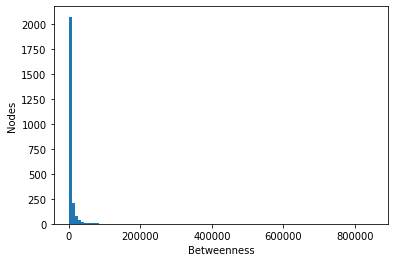

In [7]:
from matplotlib import pyplot as plt

plt.hist(between, bins=100)
plt.xlabel("Betweenness")
plt.ylabel("Nodes")
plt.plot()

In [8]:
max(between)

850663.0084644094

In [9]:
np.mean(between)

6596.260362173037

In [10]:
from scipy import stats

stats.mode(between, axis=0)

ModeResult(mode=array([0.]), count=array([583]))

In [11]:
close = graph.closeness()

In [12]:
degree = graph.degree()

[]

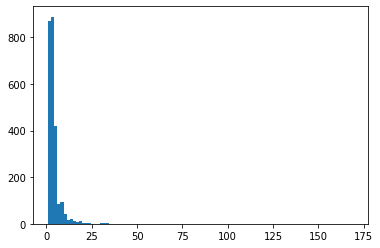

In [13]:
from matplotlib import pyplot as plt

plt.hist(degree, bins=100)
plt.plot()

In [14]:
max(degree)

169

In [15]:
sd = np.sort(degree)
sd_size = len(sd)
last_index = int(np.ceil(sd_size * 0.99))
degree_perc90 = sd[0:last_index]

[]

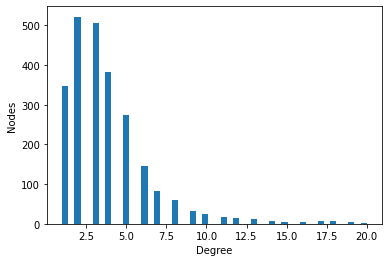

In [16]:
plt.hist(degree_perc90, bins=50)
plt.xlabel("Degree")
plt.ylabel("Nodes")
plt.plot()

[]

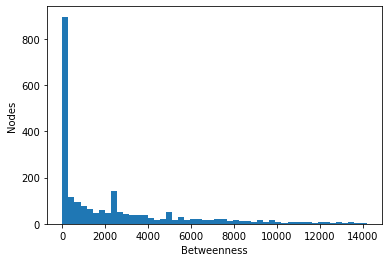

In [25]:
sd = np.sort(between)
sd_size = len(sd)
last_index = int(np.ceil(sd_size * 0.90))
degree_perc90 = sd[0:last_index]

plt.hist(degree_perc90, bins=50)
plt.xlabel("Betweenness")
plt.ylabel("Nodes")
plt.plot()